<a href="https://colab.research.google.com/github/sangcamap/text_summarization/blob/main/vietnamese_text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from string import punctuation
from underthesea import word_tokenize, sent_tokenize
from heapq import nlargest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/AI/text_summarization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/AI/text_summarization


In [ ]:
punctuation = punctuation + '\n'
punctuation = punctuation + '–'
punctuation = punctuation + '“'
punctuation = punctuation + '”'
punctuation = punctuation + '…'

In [ ]:
punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n–“”…'

In [ ]:
text = """Tại tọa đàm, nhà sử học Dương Trung Quốc chia sẻ, cầu Long Biên hiện nay đang là mối quan tâm lớn của xã hội, trước những nguy cơ mất an toàn giao thông sau nhiều sự cố xảy ra gần đây, đặt ra câu hỏi cần làm gì để bảo tồn cầu lâu dài. Cầu Long Biên đã trải qua 2 cuộc kháng chiến, gồng gánh những thương tích sau các trận đánh phá của thực dân Pháp, đế quốc Mỹ và sự tàn phá của thời gian, đến nay cây cầu Long Biên đang tự mình “già” đi dù vẫn được các đơn vị quan tâm sửa chữa, duy tu, bảo trì.Cũng theo nhà sử học Dương Trung Quốc, cầu Long Biên không chỉ có ý nghĩa về mặt giao thông, thẩm mỹ, cầu Long Biên còn có giá trị rất lớn về văn hóa. Do đó, không gì có thể thay thế cây cầu này, cả ở giá trị văn hóa và chức năng giao thông. Vì vậy, để giữ gìn cầu Long Biên, các cơ quan quản lý cần có phương án phân luồng giao thông, tổ chức giao thông linh hoạt để đảm bảo khai thác một cách phù hợp nhất.Ông Nguyễn Quốc Vượng, Giám đốc Công ty cổ phần Đường sắt Hà Hải – Tổng công ty Đường sắt Việt Nam (đơn vị trực tiếp quản lý, duy tu, bảo trì cầu Long Biên) cho biết, tiền thân cầu Long Biên gồm 30 nhịp bắc qua sông Hồng. Trong chiến tranh phá hoại năm 1972, đế quốc Mỹ đã đánh sập 17 nhịp dầm, chỉ còn 13 nhịp dầm đến bây giờ. Những nhịp bị sập đã được khắc phục, đảm bảo an toàn cầu Long Biên bằng cách thay dầm T66 của Trung Quốc. Trước thực trạng cầu yếu, Tổng công ty Đường sắt Việt Nam đã hạn chế tốc độ cho tàu qua cầu Long Biên là 15km/h (trước đây là 25-30km/h).Cũng theo ông Nguyễn Quốc Vượng, hiện công ty đang bố trí 50 cán bộ công nhân viên chia làm 5 tổ phục vụ công tác quản lý, duy tu cầu Long Biên; trong đó có 1 tổ làm nhiệm vụ tuần đường, 1 tổ bảo vệ cầu và 3 tổ duy tu. Tuy nhiên, do cầu đã hơn 120 năm tuổi, các kết cấu thép đã han gỉ, ăn mòn, cây cầu đến nay cũng đã “mỏi”, đòi hỏi phải được sửa chữa lớn để đảm bảo an toàn cho các phương tiện qua cầu.Về kinh phí bảo trì cầu Long Biên, ông Vượng cho biết, những năm gần đây đã được chú trọng, năm sau tăng hơn năm trước. Riêng năm 2022, đã được Bộ Giao thông vận tải và Tổng công ty Đường sắt Việt Nam giao 9,7 tỷ đồng; trong đó phần duy tu đường sắt hơn 7 tỷ đồng, phần bảo vệ, tuần cầu đảm bảo an toàn giao thông là 1,3 tỷ đồng và phần đường bộ 400 triệu đồng...Với số kinh phí này, công ty chỉ đảm bảo được việc thay các thanh tà vẹt gỗ bị mục nát, các thanh ray bị cong vênh, cạo gỉ các dầm cầu, lan can và sửa chữa các ổ gà trên đường bộ cũng như thay các tấm đan bị hư hỏng.Đại diện cho Bộ Giao thông vận tải, ông Bùi Khắc Điệp, Phó Vụ trưởng Vụ kết cấu hạ tầng (Bộ Giao thông vận tải) cho biết, Bộ Giao thông vận tải đã chỉ đạo Tổng công ty Đường sắt Việt Nam rà soát, khẩn trương sửa chữa ngay những hư hỏng. Đồng thời giao Tổng công ty trong năm nay kiểm định tổng thể cây cầu, đề xuất những hạng mục cần sửa chữa, quy mô, nguồn vốn và lộ trình sửa chữa cầu Long Biên. Từ đó, Bộ Giao thông vận tải tiếp tục báo cáo các cấp thẩm quyền để bố trí vốn thực hiện.Trước mắt, trong năm nay đã bố trí nguồn vốn để sửa chữa phần đường bộ bao gồm cả phần đường bộ cho xe đạp, xe máy và lối cho người đi bộ. Đây cũng là phần đường vừa qua xảy ra hiện tượng sập tấm đan. Đồng thời yêu cầu Công ty cổ phần Đường sắt Hà Hải có giải pháp ngay, ví dụ mua tấm thép dự phòng để kịp thời để lên những vị trí nguy hiểm trong khi chờ khắc phục, sửa chữa.Ông Điệp thừa nhận, vốn bảo trì hiện cũng chỉ đủ để duy trì trạng thái cầu ở mức tối thiểu. Đang rất cần có dự án tổng thể để gia cố nâng cấp chứ không thể kéo dài mãi việc sửa chữa chắp vá, nhỏ lẻ như hiện tại và chắc chắn nếu sửa chữa sẽ cần nguồn kinh phí rất lớn vì hầu như các cấu kiện của cầu đã đều quá tuổi thọ.Ông Trần Đăng Hải, Trưởng phòng kết cấu hạ tầng, Sở Giao thông Vận tải Hà Nội cho biết, cầu Long Biên hiện hữu luôn có ý nghĩa vô cùng quan trọng đối với Hà Nội trong mọi giai đoạn, thời kỳ. Hiện nay, mặc dù cầu đã quá tải, xuống cấp nhưng vẫn phục vụ giao thông qua lại cho người dân vùng lõi hai bên cầu như khu vực quận Hoàn Kiếm, khu vực Ái Mộ quận Long Biên, giảm tải rất nhiều cho cầu Chương Dương.Thực hiện Quy hoạch mạng lưới đường sắt thời kỳ 2021-2030, tầm nhìn đến năm 2050, Bộ Giao thông Vận tải hiện đang bàn giao hồ sơ các tuyến đường sắt theo quy hoạch cho Hà Nội. Trong đó có tuyến đường sắt đô thị Ngọc Hồi - Yên Viên có liên quan đến cầu Long Biên. Sau khi bàn giao xong, Hà Nội sẽ phối hợp với Bộ Giao thông vận tải tiếp tục nghiên cứu tuyến này, khi đó sẽ rõ định hướng ra sao với cầu Long Biên hiện hữu.Còn đường sắt quốc gia sẽ không đi qua cầu nữa, dừng tại khu vực đường sắt đầu mối Ngọc Hồi. Tại Ngọc Hồi là đầu mối của 3 tuyến đường sắt: Tuyến đường sắt quốc gia Bắc - Nam, tuyến đường sắt tốc độ cao và đường sắt đô thị.“Ngay cả khi đã hoàn thành xong tuyến đường sắt đô thị Ngọc Hồi - Yên Viên hay làm xong các cầu mới bắc qua sông Hồng thì cầu Long Biên vẫn có ý nghĩa quan trọng, vừa phục vụ người dân hai bên đầu cầu, vừa phục vụ nhu cầu tham quan, du lịch của du khách trong và ngoài nước đến thủ đô. Do đó cần thiết phải đầu tư bảo tồn cầu”, ông Hải chia sẻ.Là người dân gắn bó với Hà Nội từ tấm bé, chứng kiến những thăng trầm của cầu, nhà sử học Dương Trung Quốc đặc biệt nhấn mạnh sự cần thiết phải giữ lại cầu Long Biên hiện hữu. Ông Quốc cho rằng, đã là cầu thì phải có hoạt động, đi lại. Không đi lại thì cầu chỉ là cái xác công trình, là phế tích. Nhưng đi lại thế nào phải tính toán, phải phù hợp với thực trạng, tải trọng cầu và cả nhu cầu của người dân.Với quan điểm này, ông Dương Trung Quốc cho rằng, phá đi thì dễ, dựng lại rất khó, nhất là với một di sản. Do đó, cần phải đầu tư nhiều hơn cho duy tu. Muốn vậy, Nhà nước nên có cái nhìn tổng thể, sao cho vừa bảo tồn được giá trị văn hóa phi vật thể cầu Long Biên, vừa phục vụ người dân đi lại, đồng thời phát triển được du lịch, bao gồm cả du lịch bãi giữa, khi đó sẽ có đầu tư tương xứng. Hà Nội nếu coi trọng giá trị này sẽ tìm được giải pháp tốt nhất cho cầu Long Biên.Theo ông Dương Trung Quốc, để giảm áp lực cho cây cầu yếu, cảnh sát giao thông phải xử lý vi phạm ngay đầu cầu, không để lên cầu rồi mới ghi lại hình ảnh phạt nguội. Có thể phân giờ khung giờ, giờ nào cho xe máy qua, giờ nào cho khách du lịch lên cầu, chụp ảnh... Vì nhu cầu được đi lại, chụp ảnh trên cây cầu lịch sử của người dân, của du khách là chính đáng. Không chỉ Hà Nội, Bộ Văn hóa - Thể thao và Du lịch cũng phải vào cuộc, có tiếng nói để khai thác, phát huy giá trị của cầu cả trước mắt và lâu dài".Ở góc độ cơ quan quản lý Nhà nước, ông Bùi Khắc Điệp, Phó Vụ trưởng Vụ kết cấu hạ tần (Bộ Giao thông vận tải) cho rằng, trong khi chờ định hướng rõ ràng với cầu Long Biên hiện hữu, cần tăng vốn bảo trì, đồng thời có dự án sửa chữa tổng thể cầu Long Biên để đảm bảo an toàn khai thác giao thông qua cầu. Cần sớm đẩy nhanh việc xây dựng cầu mới thay thế để đáp ứng nhu cầu giao thông, vừa giảm tải cho cầu Long Biên hiện nay.Ông Nguyễn Quốc Vượng, Giám đốc Công ty cổ phần Đường sắt Hà Hải đề xuất, tới đây, cần nghiên cứu biện pháp cưỡng chế như chôn cọc hoặc xây trụ giao thông hai bên cầu để hạn chế tình trạng ô tô, xe lam đi qua cầu gây ảnh hưởng đến hạ tầng kết cấu cầu Long Biên…"""

In [ ]:
doc = word_tokenize(text)

In [ ]:
tokens = [token  for token in doc if token not in punctuation]
print(tokens)

['Tại', 'tọa đàm', 'nhà sử học', 'Dương', 'Trung Quốc', 'chia sẻ', 'cầu', 'Long Biên', 'hiện nay', 'đang', 'là', 'mối', 'quan tâm', 'lớn', 'của', 'xã hội', 'trước', 'những', 'nguy cơ', 'mất', 'an toàn', 'giao thông', 'sau', 'nhiều', 'sự cố', 'xảy', 'ra', 'gần', 'đây', 'đặt', 'ra', 'câu', 'hỏi', 'cần', 'làm', 'gì', 'để', 'bảo tồn', 'cầu', 'lâu dài', '. Cầu', 'Long Biên', 'đã', 'trải', 'qua', '2', 'cuộc', 'kháng chiến', 'gồng gánh', 'những', 'thương tích', 'sau', 'các', 'trận', 'đánh phá', 'của', 'thực dân', 'Pháp', 'đế quốc', 'Mỹ', 'và', 'sự', 'tàn phá', 'của', 'thời gian', 'đến', 'nay', 'cây', 'cầu', 'Long Biên', 'đang', 'tự', 'mình', 'già', 'đi', 'dù', 'vẫn', 'được', 'các', 'đơn vị', 'quan tâm', 'sửa chữa', 'duy tu', 'bảo trì', 'Cũng', 'theo', 'nhà sử học', 'Dương', 'Trung Quốc', 'cầu', 'Long Biên', 'không', 'chỉ', 'có', 'ý nghĩa', 'về', 'mặt', 'giao thông', 'thẩm mỹ', 'cầu', 'Long Biên', 'còn', 'có', 'giá trị', 'rất', 'lớn', 'về', 'văn hóa', 'Do đó', 'không', 'gì', 'có thể', 'thay th

In [ ]:
# Stop word

f = open("stopword-vi.txt", "r")
STOP_WORDS = [str(word[0: len(word) - 1]) for word in f]

In [ ]:
STOP_WORDS

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược',
 'bất quá',
 'bất quá chỉ',
 'bất thình l

In [ ]:
# Loại bỏ stop word
word_fred = {}
stop_words = STOP_WORDS

for word in doc:
  if (word.lower() not in stop_words):
    if (word.lower() not in punctuation):
      if (word.lower() not in word_fred.keys()):
        word_fred[word.lower()] = 1 
      else:
        word_fred[word.lower()] += 1

In [ ]:
word_fred

{'. còn': 1,
 '. cần': 1,
 '. cầu': 1,
 '. hà nội': 1,
 '. không': 2,
 '. muốn': 1,
 '. riêng': 1,
 '. thực hiện': 1,
 '. trong': 2,
 '. về': 1,
 '. ông': 4,
 '. ông quốc': 1,
 '. đang': 1,
 '. đây': 1,
 '...': 2,
 '1': 2,
 '1,3': 1,
 '120': 1,
 '13': 1,
 '15': 1,
 '17': 1,
 '1972': 1,
 '2': 1,
 '2021': 1,
 '2022': 1,
 '2030': 1,
 '2050': 1,
 '25-30': 1,
 '3': 2,
 '30': 1,
 '400': 1,
 '5': 1,
 '50': 1,
 '7': 1,
 '9,7': 1,
 'an': 1,
 'an toàn': 4,
 'bao gồm': 2,
 'biện pháp': 1,
 'bàn giao': 2,
 'báo cáo': 1,
 'bãi': 1,
 'bùi khắc điệp': 2,
 'bảo trì': 5,
 'bảo tồn': 3,
 'bảo vệ': 2,
 'bắc': 3,
 'bố trí': 3,
 'bộ văn hóa': 1,
 'chia': 1,
 'chiến tranh': 1,
 'chính đáng': 1,
 'chôn': 1,
 'chú trọng': 1,
 'chương dương': 1,
 'chắp vá': 1,
 'chỉ đạo': 1,
 'chờ': 2,
 'chụp': 2,
 'chức năng': 1,
 'chứng kiến': 1,
 'coi trọng': 1,
 'cong': 1,
 'cán bộ': 1,
 'câu': 1,
 'công nhân viên': 1,
 'công trình': 1,
 'công ty': 5,
 'công tác': 1,
 'cơ quan': 2,
 'cưỡng chế': 1,
 'cạo': 1,
 'cảnh sát': 

In [ ]:
max_fred = max(word_fred.values())
for word in word_fred.keys():
  word_fred[word] = word_fred[word] / max_fred

word_fred

{'. còn': 0.01818181818181818,
 '. cần': 0.01818181818181818,
 '. cầu': 0.01818181818181818,
 '. hà nội': 0.01818181818181818,
 '. không': 0.03636363636363636,
 '. muốn': 0.01818181818181818,
 '. riêng': 0.01818181818181818,
 '. thực hiện': 0.01818181818181818,
 '. trong': 0.03636363636363636,
 '. về': 0.01818181818181818,
 '. ông': 0.07272727272727272,
 '. ông quốc': 0.01818181818181818,
 '. đang': 0.01818181818181818,
 '. đây': 0.01818181818181818,
 '...': 0.03636363636363636,
 '1': 0.03636363636363636,
 '1,3': 0.01818181818181818,
 '120': 0.01818181818181818,
 '13': 0.01818181818181818,
 '15': 0.01818181818181818,
 '17': 0.01818181818181818,
 '1972': 0.01818181818181818,
 '2': 0.01818181818181818,
 '2021': 0.01818181818181818,
 '2022': 0.01818181818181818,
 '2030': 0.01818181818181818,
 '2050': 0.01818181818181818,
 '25-30': 0.01818181818181818,
 '3': 0.03636363636363636,
 '30': 0.01818181818181818,
 '400': 0.01818181818181818,
 '5': 0.01818181818181818,
 '50': 0.01818181818181818,


In [ ]:
sent_tokens = sent_tokenize(text)
sent_tokens

['Tại tọa đàm, nhà sử học Dương Trung Quốc chia sẻ, cầu Long Biên hiện nay đang là mối quan tâm lớn của xã hội, trước những nguy cơ mất an toàn giao thông sau nhiều sự cố xảy ra gần đây, đặt ra câu hỏi cần làm gì để bảo tồn cầu lâu dài.',
 'Cầu Long Biên đã trải qua 2 cuộc kháng chiến, gồng gánh những thương tích sau các trận đánh phá của thực dân Pháp, đế quốc Mỹ và sự tàn phá của thời gian, đến nay cây cầu Long Biên đang tự mình “già” đi dù vẫn được các đơn vị quan tâm sửa chữa, duy tu, bảo trì.Cũng theo nhà sử học Dương Trung Quốc, cầu Long Biên không chỉ có ý nghĩa về mặt giao thông, thẩm mỹ, cầu Long Biên còn có giá trị rất lớn về văn hóa.',
 'Do đó, không gì có thể thay thế cây cầu này, cả ở giá trị văn hóa và chức năng giao thông.',
 'Vì vậy, để giữ gìn cầu Long Biên, các cơ quan quản lý cần có phương án phân luồng giao thông, tổ chức giao thông linh hoạt để đảm bảo khai thác một cách phù hợp nhất.Ông Nguyễn Quốc Vượng, Giám đốc Công ty cổ phần Đường sắt Hà Hải – Tổng công ty Đư

In [ ]:
sent_score = {}
for sent in sent_tokens:
  for word in sent: 
    if word.lower() in word_fred.keys(): 
      if sent not in sent_score.keys():
        sent_score[sent] = word_fred[word.lower()]
      else:
        sent_score[sent] += word_fred[word.lower()]

In [ ]:
sent_score

{'Có thể phân giờ khung giờ, giờ nào cho xe máy qua, giờ nào cho khách du lịch lên cầu, chụp ảnh... Vì nhu cầu được đi lại, chụp ảnh trên cây cầu lịch sử của người dân, của du khách là chính đáng.': 0.6545454545454547,
 'Cần sớm đẩy nhanh việc xây dựng cầu mới thay thế để đáp ứng nhu cầu giao thông, vừa giảm tải cho cầu Long Biên hiện nay.Ông Nguyễn Quốc Vượng, Giám đốc Công ty cổ phần Đường sắt Hà Hải đề xuất, tới đây, cần nghiên cứu biện pháp cưỡng chế như chôn cọc hoặc xây trụ giao thông hai bên cầu để hạn chế tình trạng ô tô, xe lam đi qua cầu gây ảnh hưởng đến hạ tầng kết cấu cầu Long Biên…': 0.9090909090909093,
 'Cầu Long Biên đã trải qua 2 cuộc kháng chiến, gồng gánh những thương tích sau các trận đánh phá của thực dân Pháp, đế quốc Mỹ và sự tàn phá của thời gian, đến nay cây cầu Long Biên đang tự mình “già” đi dù vẫn được các đơn vị quan tâm sửa chữa, duy tu, bảo trì.Cũng theo nhà sử học Dương Trung Quốc, cầu Long Biên không chỉ có ý nghĩa về mặt giao thông, thẩm mỹ, cầu Long B

In [58]:
summary = nlargest(n = 5, iterable = sent_score, key = sent_score.get)
summary

['Riêng năm 2022, đã được Bộ Giao thông vận tải và Tổng công ty Đường sắt Việt Nam giao 9,7 tỷ đồng; trong đó phần duy tu đường sắt hơn 7 tỷ đồng, phần bảo vệ, tuần cầu đảm bảo an toàn giao thông là 1,3 tỷ đồng và phần đường bộ 400 triệu đồng...Với số kinh phí này, công ty chỉ đảm bảo được việc thay các thanh tà vẹt gỗ bị mục nát, các thanh ray bị cong vênh, cạo gỉ các dầm cầu, lan can và sửa chữa các ổ gà trên đường bộ cũng như thay các tấm đan bị hư hỏng.Đại diện cho Bộ Giao thông vận tải, ông Bùi Khắc Điệp, Phó Vụ trưởng Vụ kết cấu hạ tầng (Bộ Giao thông vận tải) cho biết, Bộ Giao thông vận tải đã chỉ đạo Tổng công ty Đường sắt Việt Nam rà soát, khẩn trương sửa chữa ngay những hư hỏng.',
 'Hiện nay, mặc dù cầu đã quá tải, xuống cấp nhưng vẫn phục vụ giao thông qua lại cho người dân vùng lõi hai bên cầu như khu vực quận Hoàn Kiếm, khu vực Ái Mộ quận Long Biên, giảm tải rất nhiều cho cầu Chương Dương.Thực hiện Quy hoạch mạng lưới đường sắt thời kỳ 2021-2030, tầm nhìn đến năm 2050, Bộ 

In [59]:
final_summary = [word for word in summary]

In [60]:
final_summary

['Riêng năm 2022, đã được Bộ Giao thông vận tải và Tổng công ty Đường sắt Việt Nam giao 9,7 tỷ đồng; trong đó phần duy tu đường sắt hơn 7 tỷ đồng, phần bảo vệ, tuần cầu đảm bảo an toàn giao thông là 1,3 tỷ đồng và phần đường bộ 400 triệu đồng...Với số kinh phí này, công ty chỉ đảm bảo được việc thay các thanh tà vẹt gỗ bị mục nát, các thanh ray bị cong vênh, cạo gỉ các dầm cầu, lan can và sửa chữa các ổ gà trên đường bộ cũng như thay các tấm đan bị hư hỏng.Đại diện cho Bộ Giao thông vận tải, ông Bùi Khắc Điệp, Phó Vụ trưởng Vụ kết cấu hạ tầng (Bộ Giao thông vận tải) cho biết, Bộ Giao thông vận tải đã chỉ đạo Tổng công ty Đường sắt Việt Nam rà soát, khẩn trương sửa chữa ngay những hư hỏng.',
 'Hiện nay, mặc dù cầu đã quá tải, xuống cấp nhưng vẫn phục vụ giao thông qua lại cho người dân vùng lõi hai bên cầu như khu vực quận Hoàn Kiếm, khu vực Ái Mộ quận Long Biên, giảm tải rất nhiều cho cầu Chương Dương.Thực hiện Quy hoạch mạng lưới đường sắt thời kỳ 2021-2030, tầm nhìn đến năm 2050, Bộ 

In [62]:
summary = " ".join(final_summary)
summary

'Riêng năm 2022, đã được Bộ Giao thông vận tải và Tổng công ty Đường sắt Việt Nam giao 9,7 tỷ đồng; trong đó phần duy tu đường sắt hơn 7 tỷ đồng, phần bảo vệ, tuần cầu đảm bảo an toàn giao thông là 1,3 tỷ đồng và phần đường bộ 400 triệu đồng...Với số kinh phí này, công ty chỉ đảm bảo được việc thay các thanh tà vẹt gỗ bị mục nát, các thanh ray bị cong vênh, cạo gỉ các dầm cầu, lan can và sửa chữa các ổ gà trên đường bộ cũng như thay các tấm đan bị hư hỏng.Đại diện cho Bộ Giao thông vận tải, ông Bùi Khắc Điệp, Phó Vụ trưởng Vụ kết cấu hạ tầng (Bộ Giao thông vận tải) cho biết, Bộ Giao thông vận tải đã chỉ đạo Tổng công ty Đường sắt Việt Nam rà soát, khẩn trương sửa chữa ngay những hư hỏng. Hiện nay, mặc dù cầu đã quá tải, xuống cấp nhưng vẫn phục vụ giao thông qua lại cho người dân vùng lõi hai bên cầu như khu vực quận Hoàn Kiếm, khu vực Ái Mộ quận Long Biên, giảm tải rất nhiều cho cầu Chương Dương.Thực hiện Quy hoạch mạng lưới đường sắt thời kỳ 2021-2030, tầm nhìn đến năm 2050, Bộ Giao 

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

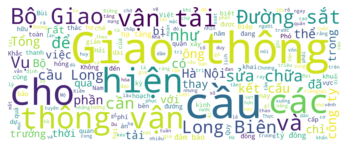

In [65]:
wordcloud = WordCloud( background_color="white", height=800, width= 2000).generate(summary)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()